In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/insurance_data.csv')

In [ ]:
data
#We want to predict the charges

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
#Clean Data -> No null values, No duplicacy, outliers

In [ ]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
data.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
data.isnull().sum().sum()

52

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#52 -> Null values
#1st -> Delete these null values
#2nd -> Replace these null values

In [ ]:
col_list = list(data.columns)
col_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
for x in col_list:
  if data[x].dtypes=='object':
    data[x] = data[x].fillna(data[x].mode()[0])
  else:
    data[x] = data[x].fillna(data[x].mean())

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
#Duplicacy

data.duplicated().sum()

0

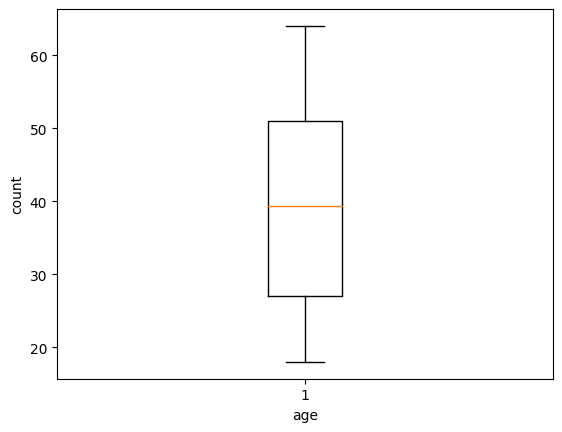

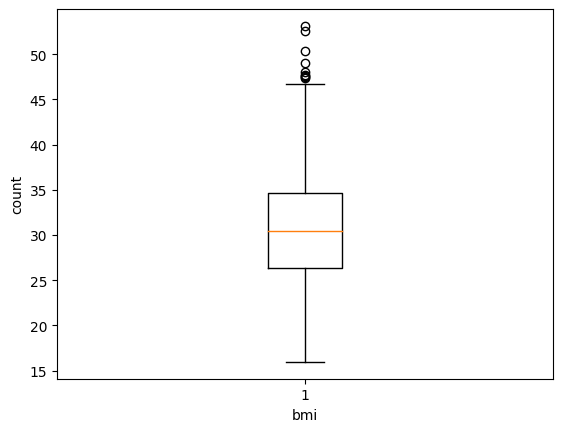

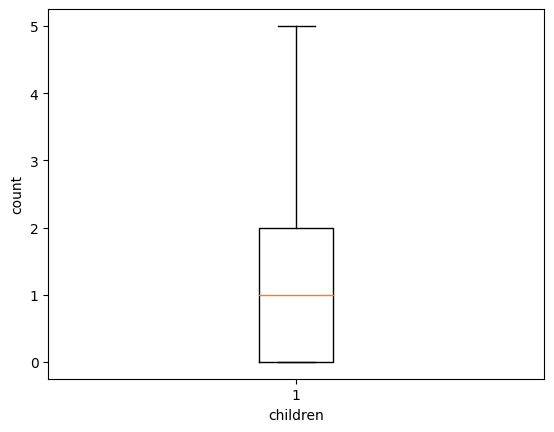

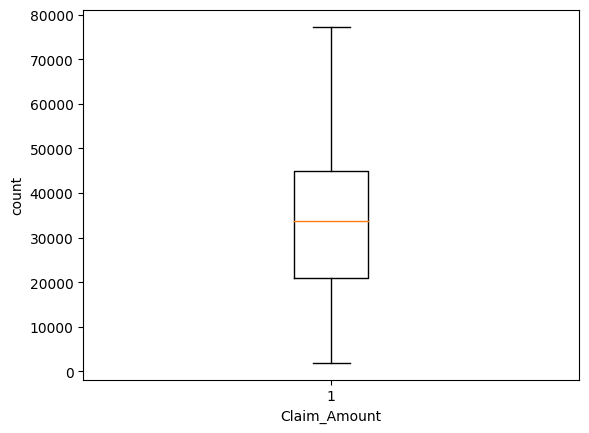

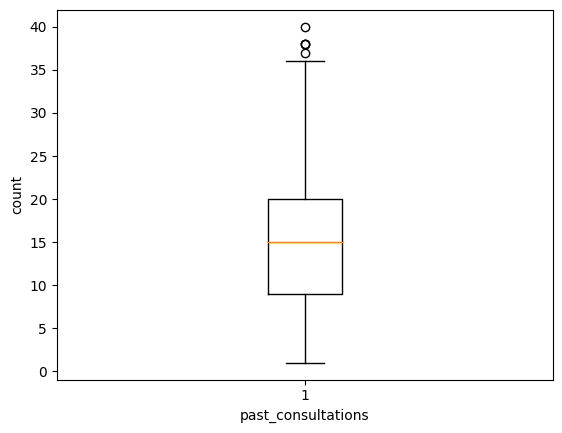

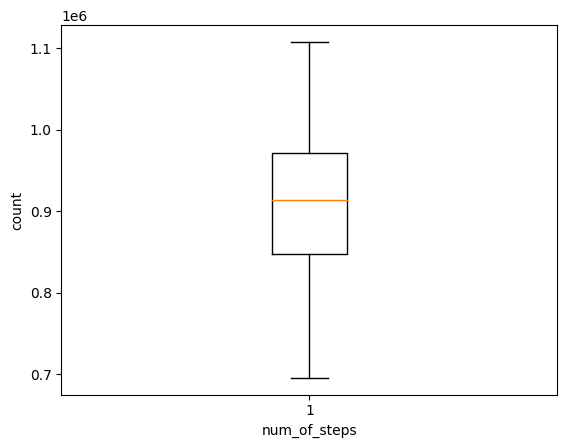

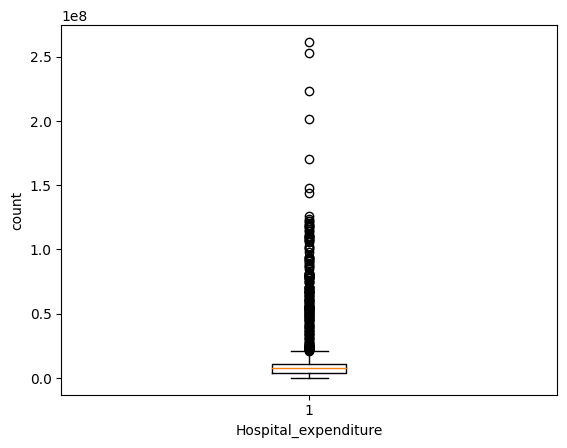

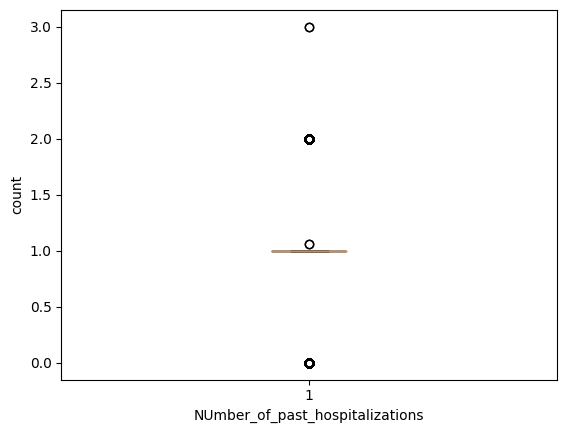

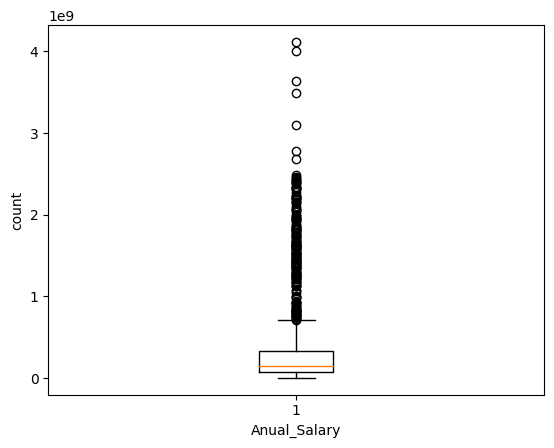

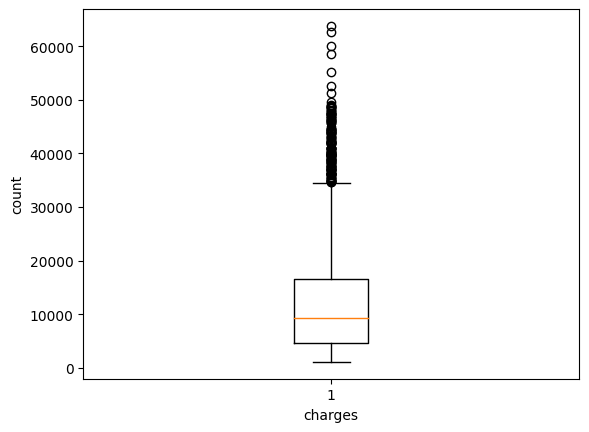

In [ ]:
#Outliers ->
for x in col_list:
  if(data[x].dtypes=='float64'):
    plt.boxplot(data[x])
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()

In [ ]:
#Remove these outliers

In [ ]:
Q1= data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)

Q1

26.315

In [ ]:
Q3

34.65625

In [ ]:
IQR = Q3-Q1
IQR

8.341249999999999

In [ ]:
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

In [ ]:
lower_fence

13.803125000000003

In [ ]:
upper_fence

47.168124999999996

In [ ]:
data = data[(data.bmi>=lower_fence) & (data.bmi<=upper_fence)]

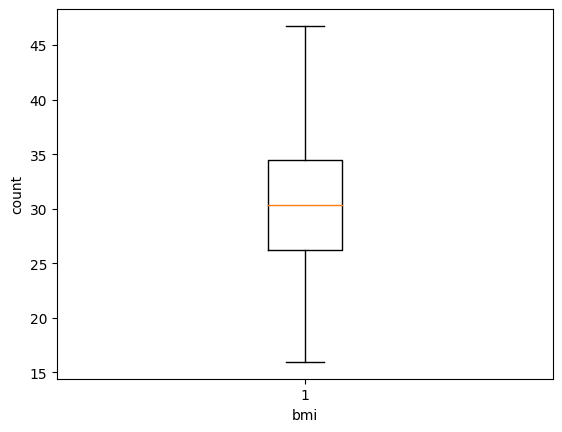

In [ ]:
plt.boxplot(data.bmi)
plt.xlabel('bmi')
plt.ylabel('count')
plt.show()

In [ ]:
for x in col_list:
  if data[x].dtypes!='object' and x!='charges':
    Q1= data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3-Q1
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    data = data[(data[x]>=lower_fence) & (data[x]<=upper_fence)]

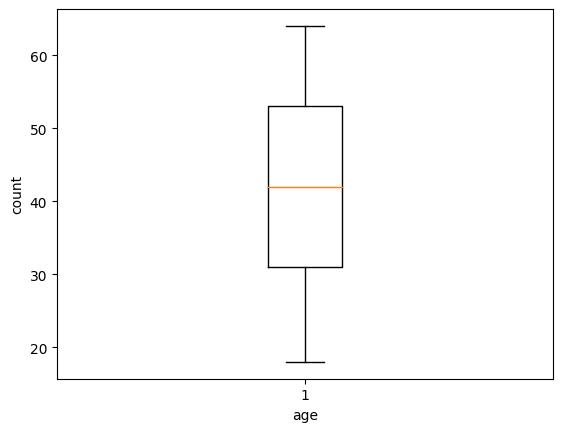

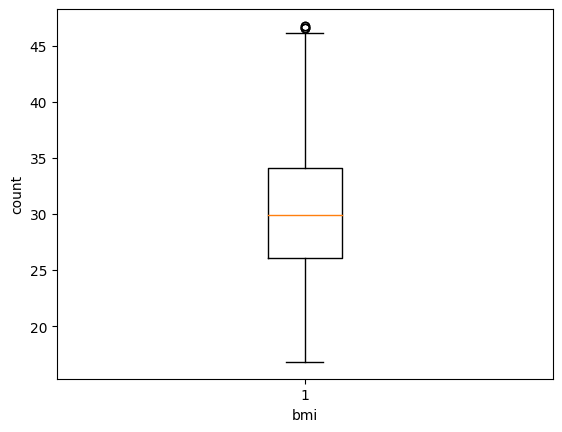

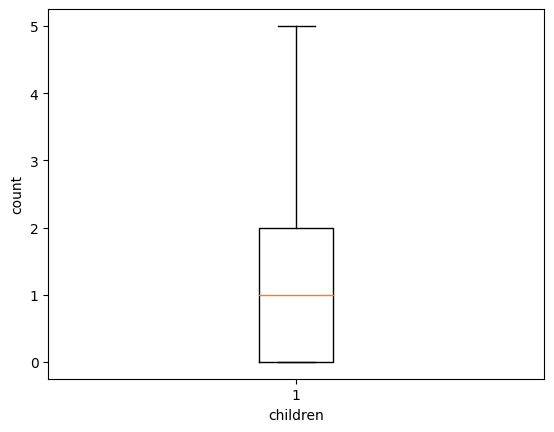

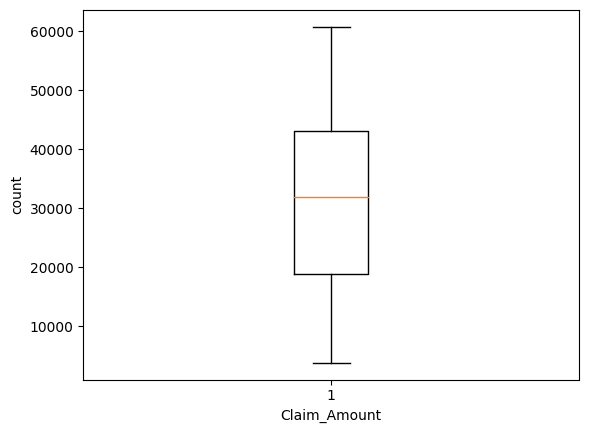

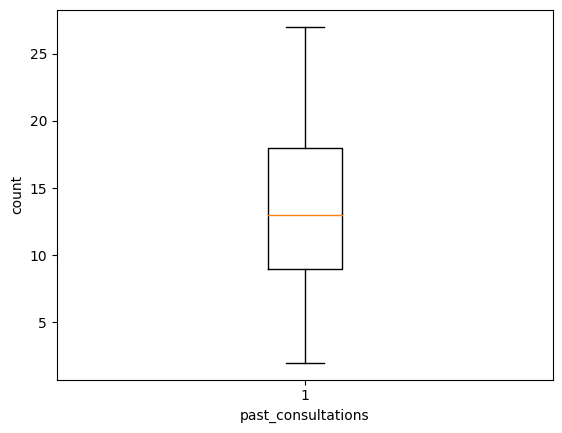

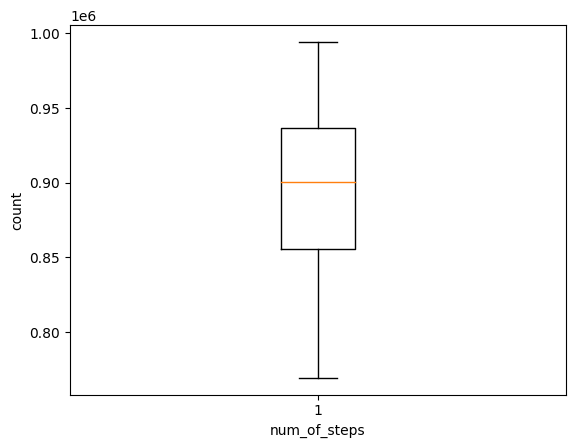

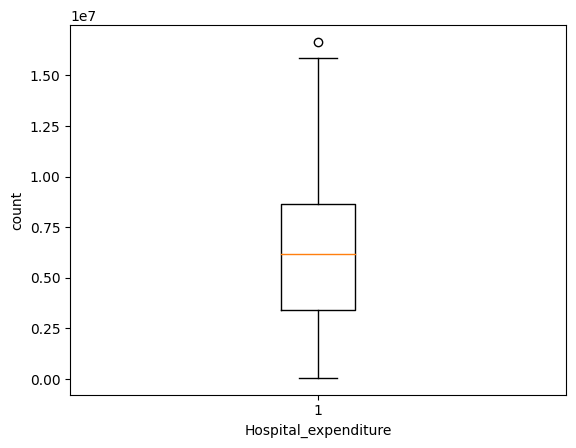

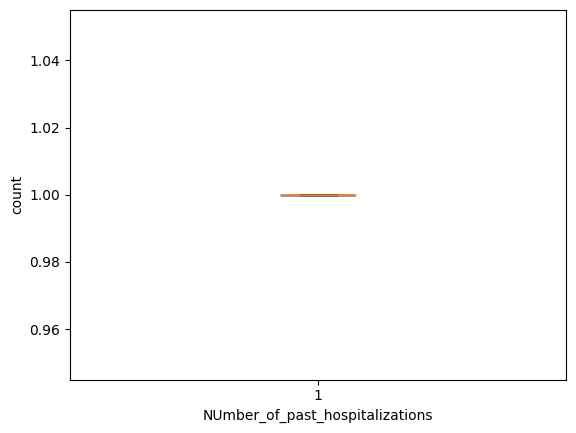

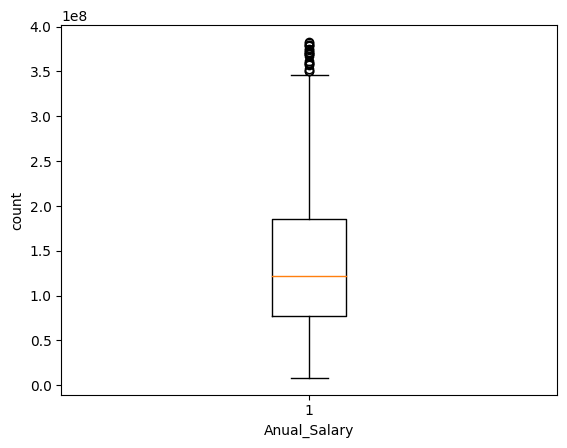

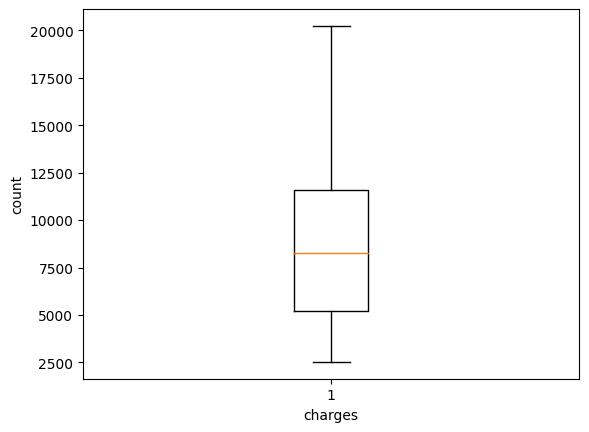

In [ ]:
for x in col_list:
  if(data[x].dtypes=='float64'):
    plt.boxplot(data[x])
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()

In [ ]:
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


In [ ]:
col_list2 = []
for x in data.columns:
  if(data[x].dtypes!='object' and x!='charges'):
    col_list2.append(x)

In [ ]:
col_list2

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Variance inflation factor -> Co-relation between your columns.
#Higher the VIF higher the co-relation
#VIF<=6 is considered as good. rest means there is high-corelaiton.
#VIF>6 we will remove that column from our dataset.

In [ ]:
X = data[col_list2]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [ ]:
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,age,2.196194
1,bmi,1.052717
2,children,1.076523
3,Claim_Amount,1.035033
4,past_consultations,1.073989
5,num_of_steps,5.882074
6,Hospital_expenditure,1.173208
7,NUmber_of_past_hospitalizations,1393.169724
8,Anual_Salary,3.983678


In [ ]:
data = data.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [ ]:
col_list2 = []
for x in data.columns:
  if(data[x].dtypes!='object' and x!='charges'):
    col_list2.append(x)
X = data[col_list2]
X
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,age,16.357708
1,bmi,26.868143
2,children,2.069345
3,Claim_Amount,5.864753
4,past_consultations,6.463488
5,num_of_steps,58.376344
6,Hospital_expenditure,5.423018
7,Anual_Salary,6.000703


In [ ]:
data = data.drop(['num_of_steps'],axis=1)

In [ ]:
col_list2 = []
for x in data.columns:
  if(data[x].dtypes!='object' and x!='charges'):
    col_list2.append(x)
X = data[col_list2]
X
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,age,13.550906
1,bmi,14.522848
2,children,1.954239
3,Claim_Amount,5.319321
4,past_consultations,5.957746
5,Hospital_expenditure,5.142291
6,Anual_Salary,5.783595


In [ ]:
data = data.drop(['bmi'],axis=1)

In [ ]:
col_list2 = []
for x in data.columns:
  if(data[x].dtypes!='object' and x!='charges'):
    col_list2.append(x)
X = data[col_list2]
X
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,age,8.803866
1,children,1.835999
2,Claim_Amount,4.912972
3,past_consultations,5.613220
4,Hospital_expenditure,4.840950
5,Anual_Salary,5.636699


In [ ]:
data = data.drop(['age'],axis=1)

KeyError: "['age'] not found in axis"

In [ ]:
col_list2 = []
for x in data.columns:
  if(data[x].dtypes!='object' and x!='charges'):
    col_list2.append(x)
X = data[col_list2]
X
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,children,1.827298
1,Claim_Amount,4.290828
2,past_consultations,4.942338
3,Hospital_expenditure,4.624025
4,Anual_Salary,4.922027


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,male,0.0,no,39148.95495,10.0,8.614147e+06,5.452601e+07,northwest,2523.16950
152,female,0.0,no,41547.52536,13.0,2.491594e+05,1.671847e+07,northwest,2527.81865
153,male,0.0,no,39660.60193,12.0,3.043323e+06,4.852694e+07,northwest,2534.39375
154,male,2.0,no,16032.87148,7.0,1.599069e+06,2.441262e+07,southeast,2566.47070
155,female,1.0,no,31090.98977,21.0,3.015365e+06,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...
1046,female,1.0,yes,51168.25474,23.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,male,3.0,yes,46619.40230,27.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,male,0.0,yes,24382.58056,21.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,female,2.0,yes,21596.43846,10.0,1.083030e+07,3.696849e+08,northeast,19798.05455


In [ ]:
X = data.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]

In [ ]:
Y= data.iloc[:,-1]

In [ ]:
X

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
151,0.0,39148.95495,10.0,8.614147e+06,5.452601e+07
152,0.0,41547.52536,13.0,2.491594e+05,1.671847e+07
153,0.0,39660.60193,12.0,3.043323e+06,4.852694e+07
154,2.0,16032.87148,7.0,1.599069e+06,2.441262e+07
155,1.0,31090.98977,21.0,3.015365e+06,5.853579e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [ ]:
Y

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=0)             #80% for training, 20% for testing

In [ ]:
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
373,1.0,47511.14927,15.0,6.969061e+06,4.423883e+07
351,1.0,35692.37968,15.0,3.976034e+06,1.136275e+08
313,4.0,42330.32386,3.0,3.499504e+06,3.532900e+07
730,0.0,55821.53246,17.0,5.048570e+06,1.725900e+08
996,0.0,32076.78940,21.0,1.012317e+07,3.500268e+08
...,...,...,...,...,...
990,0.0,47093.96209,8.0,5.609627e+06,3.180444e+08
343,3.0,33361.32718,11.0,6.580440e+05,4.832614e+07
783,0.0,41899.68772,20.0,2.480337e+06,1.641562e+08
713,1.0,44031.97502,12.0,4.111041e+06,1.330173e+08


In [ ]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
301,2.0,15674.885110,5.0,5.648537e+06,5.142174e+07
557,1.0,43176.571140,5.0,2.649410e+06,1.137310e+08
665,3.0,19869.012440,11.0,1.021216e+07,1.635565e+08
252,2.0,5579.521689,10.0,4.963711e+06,4.472124e+07
738,1.0,34306.071490,13.0,3.091703e+06,1.877810e+08
...,...,...,...,...,...
513,1.0,48018.271590,16.0,7.225505e+06,1.197414e+08
518,3.0,21513.932850,7.0,7.614067e+06,1.088563e+08
415,2.0,47705.793100,20.0,4.781388e+06,1.315786e+08
471,0.0,12929.429980,13.0,4.475731e+05,5.840026e+07


In [ ]:
y_train

,charges
373,5240.76500
351,4894.75330
313,4504.66240
730,10338.93160
996,16232.84700
...,...
990,15820.69900
343,4827.90495
783,11165.41765
713,10065.41300


In [ ]:
y_test

,charges
301,4428.88785
557,7727.25320
665,9301.89355
252,3847.67400
738,10450.55200
...,...
513,7153.55390
518,7196.86700
415,5836.52040
471,6571.02435


In [ ]:
linear_reg = LinearRegression()
#x_train,x_test,y_train,y_test

In [ ]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#We will pass our testing data

In [ ]:
model_predict = linear_reg.predict(x_test)

In [ ]:
model_predict

array([ 4323.68367061,  7362.02500314,  9687.53083196,  4008.45033758,
       10770.28437629, 11520.48364752, 13532.44108465, 17559.18503018,
        9660.30473605,  6318.81438787,  7458.35973135,  7981.74333789,
        5284.65460914, 16228.53418239,  9476.42907556, 11079.24567797,
        6198.21461623,  5556.67779281,  4834.43427955,  5741.14814486,
       11863.53648074,  6076.75487824,  5702.39786219,  6343.45978386,
        9096.64500796,  3142.47850141, 11040.32735513,  5445.33054574,
       11274.62070508,  9058.17757227, 19048.17732927, 10849.03940797,
       20260.64927393,  8290.93030508,  9060.5207345 , 12305.80154227,
        7707.41686389,  6347.95123369,  7756.19242215,  6843.72614291,
        9872.77698348,  9388.29616409,  5220.48605306,  9679.72286186,
        6352.2069316 ,  5498.30561196, 15375.0283622 ,  7953.24305698,
       10992.87388778, 12535.05464483,  5729.91077434,  6171.87742244,
        6505.70166038, 12474.46807603,  5750.91796478, 13848.35903717,
      

In [ ]:
error= pd.DataFrame(columns=["Actual Values","Predicted Values"])

In [ ]:
error

,Actual Values,Predicted Values


In [ ]:
error["Actual Values"] = y_test

In [ ]:
error

,Actual Values,Predicted Values
301,4428.88785,NaN
557,7727.25320,NaN
665,9301.89355,NaN
252,3847.67400,NaN
738,10450.55200,NaN
...,...,...
513,7153.55390,NaN
518,7196.86700,NaN
415,5836.52040,NaN
471,6571.02435,NaN


In [ ]:
error["Predicted Values"] = model_predict

In [ ]:
error

,Actual Values,Predicted Values
301,4428.88785,4323.683671
557,7727.25320,7362.025003
665,9301.89355,9687.530832
252,3847.67400,4008.450338
738,10450.55200,10770.284376
...,...,...
513,7153.55390,8084.600823
518,7196.86700,7107.471945
415,5836.52040,8712.210267
471,6571.02435,4606.853148


In [ ]:
error["error_rate"] = error["Actual Values"]-error["Predicted Values"]

In [ ]:
error

,Actual Values,Predicted Values,error_rate
301,4428.88785,4323.683671,105.204179
557,7727.25320,7362.025003,365.228197
665,9301.89355,9687.530832,-385.637282
252,3847.67400,4008.450338,-160.776338
738,10450.55200,10770.284376,-319.732376
...,...,...,...
513,7153.55390,8084.600823,-931.046923
518,7196.86700,7107.471945,89.395055
415,5836.52040,8712.210267,-2875.689867
471,6571.02435,4606.853148,1964.171202


In [ ]:
#To check errors -> mse rmse
#mse -> Mean Squared Error
#rmse ->Root mean squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test,model_predict)
mse

2471248.93586538

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

1572.0206537655222

In [ ]:
mae = mean_absolute_error(y_test,model_predict)
mae

1304.9558711547818

In [ ]:
from sklearn.metrics import *

r2_accuracy = r2_score(y_test,model_predict)
r2_accuracy

0.8305358786138229

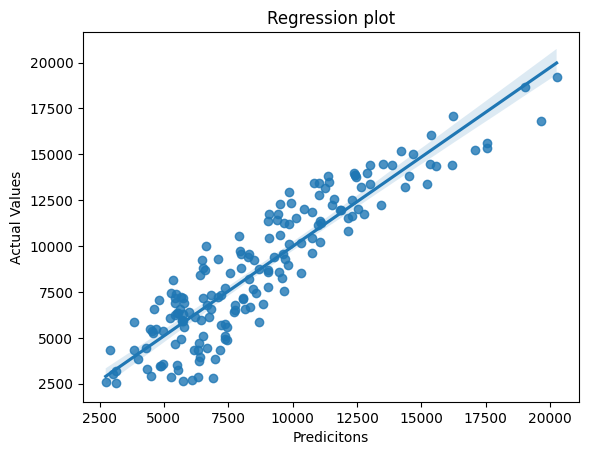

In [ ]:
sns.regplot(x=model_predict,y=y_test)
plt.xlabel("Predicitons")
plt.ylabel("Actual Values")
plt.title("Regression plot")
plt.show()